# Clase 12 - Gráficos de puntos y de líneas

## A. Importar librerías requeridas

In [1]:
# Importo librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## B. Cargar dataset

El dataset que cargaremos consiste en obsercaciones de resonancia magnética (fmri) hecha a diferentes pacientes (conlumna subject)

In [2]:
fmri = sns.load_dataset("fmri")

In [4]:
# Cuántas obsercaciones hay en el dataset?
len(fmri)

1064

In [6]:
# Revisamos las 5 primeras filas
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [7]:
# Para poder graficar una solo seria de puntos
# (una observación en cada momento en el tiempo) vamos a elegir:
# un paciente: s13
# un evento observado: cue (podría ser 'stim')
# una región del cerebro observada: frontal (podría ser parietal)

subject13 = fmri.loc[ (fmri.subject == 's13') & (fmri.event == 'cue') & (fmri.region == 'frontal') ]
print(subject13)

     subject  timepoint event   region    signal
605      s13          5   cue  frontal  0.056731
625      s13          0   cue  frontal -0.012576
637      s13          4   cue  frontal  0.058704
651      s13          3   cue  frontal  0.034135
659      s13          6   cue  frontal  0.022420
680      s13         17   cue  frontal -0.004190
708      s13         18   cue  frontal -0.012163
730      s13         14   cue  frontal -0.005701
770      s13         15   cue  frontal -0.003053
784      s13         16   cue  frontal -0.002522
938      s13         11   cue  frontal -0.040369
952      s13         10   cue  frontal -0.066287
960      s13         13   cue  frontal -0.009388
981      s13          2   cue  frontal  0.004396
995      s13          1   cue  frontal -0.010346
1016     s13          9   cue  frontal -0.082955
1029     s13          8   cue  frontal -0.070991
1040     s13         12   cue  frontal -0.020686
1060     s13          7   cue  frontal -0.029130


In [8]:
# Antes de graficar ordenaremos las filas en base a la columna timepoint
subject13 = subject13.sort_values(by='timepoint')
print(subject13)

     subject  timepoint event   region    signal
625      s13          0   cue  frontal -0.012576
995      s13          1   cue  frontal -0.010346
981      s13          2   cue  frontal  0.004396
651      s13          3   cue  frontal  0.034135
637      s13          4   cue  frontal  0.058704
605      s13          5   cue  frontal  0.056731
659      s13          6   cue  frontal  0.022420
1060     s13          7   cue  frontal -0.029130
1029     s13          8   cue  frontal -0.070991
1016     s13          9   cue  frontal -0.082955
952      s13         10   cue  frontal -0.066287
938      s13         11   cue  frontal -0.040369
1040     s13         12   cue  frontal -0.020686
960      s13         13   cue  frontal -0.009388
730      s13         14   cue  frontal -0.005701
770      s13         15   cue  frontal -0.003053
784      s13         16   cue  frontal -0.002522
680      s13         17   cue  frontal -0.004190
708      s13         18   cue  frontal -0.012163


## C. Gráfico de puntos

### C1. Usando matplotlib

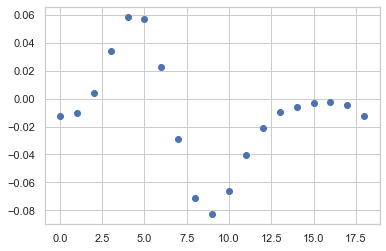

In [14]:
# Grafiquemos la señal en 19 puntos en el tiempo del usuario s13

sns.set() # Dejo por defecto los valores de seaborn
sns.set_style('whitegrid')

plt.plot(subject13.timepoint, subject13.signal, marker='o', linestyle='')

### C.2 Gráfico de puntos con seaborn

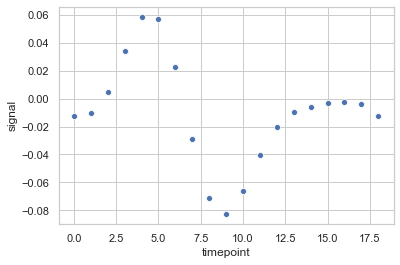

In [18]:
# Graficamos los daltos dle subject 13 con seaborn
ax = sns.lineplot(x='timepoint', y='signal', data=subject13, linewidth=0, marker = 'o')

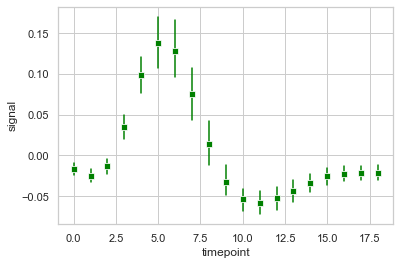

In [20]:
# Usemos ahora todos los datos asociados a un mismo timepoint (no sólo subject 13)
# El marker ahora es un promedio de las señales de un mismo timepoint:
# podemos tener barras de desviación estándar asociadas
# Estos es muy fácil de hacer con seaborn

# Notar que para el lineplot de seaborn no tenemos que ordenar los datos previamente

ax = sns.lineplot(x='timepoint', y='signal', color='green',
                  data=fmri, linewidth=0, marker='s',
                  err_style='bars') # err_style es para mostrar la banda de error

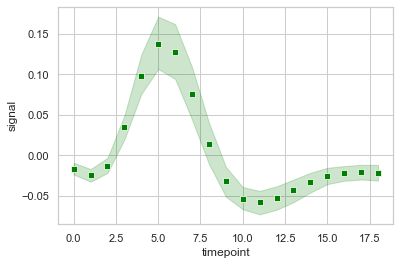

In [21]:
# Y con banda de error en lugar de barras de error

ax = sns.lineplot(x='timepoint', y="signal", color="green"
                 ,data=fmri, linewidth=0, marker='s', err_style='band')

## D. Gráfico de líneas

### D1. Gráfico de lineas usando matplotlib

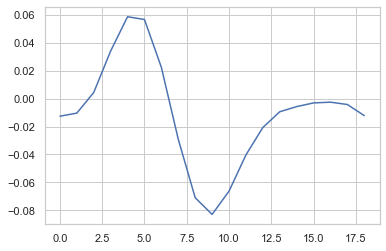

In [22]:
plt.plot(subject13.timepoint, subject13.signal)

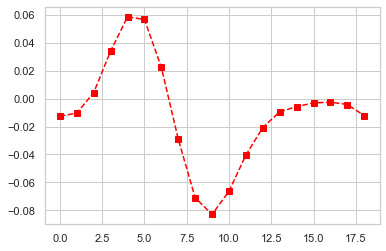

In [23]:
# Podemos modificarlo visualmente
plt.plot(subject13.timepoint, subject13.signal,
        marker='s', linestyle='--', color='red')

### D.2 Gráfico de lineas usando seaborn

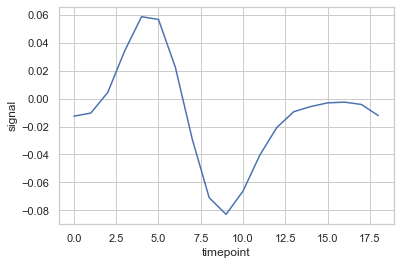

In [25]:
# Versión por defecto en seaborn

ax = sns.lineplot(x="timepoint", y="signal", data=subject13)

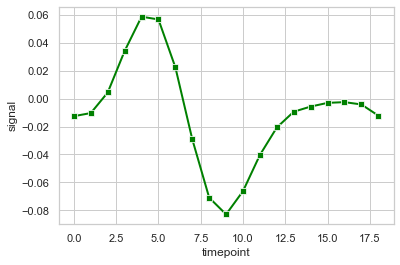

In [28]:
# Podemos modificar algunas propiedades

ax = sns.lineplot(x="timepoint", y="signal", color="green"
                  ,data=subject13, linewidth=2, marker='s')

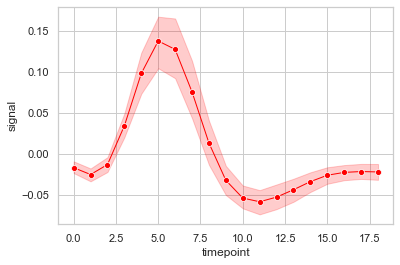

In [29]:
# Con varios puntos en el mismo timepoint (todos los subjects)
# podemos agregar bandas de error

# Change background style
sns.set_style('whitegrid')

ax = sns.lineplot(x='timepoint', y='signal', color='red',
                 data=fmri, linewidth=1, marker='o', err_style='band') # Muestra el rango de error 